In [2]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d salader/dogs-vs-cats

!unzip dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

In [43]:
import tensorflow as tf
import keras

In [53]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomBrightness(0.2),
])

train_data_raw = tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True
)

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True
)

class_names = train_data_raw.class_names

# Apply augmentation to training data
train_data = train_data_raw.map(lambda x, y: (data_augmentation(x, training=True), y))

# Print class names to verify
print("Class Names:", class_names)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.
Class Names: ['cats', 'dogs']


In [54]:
class_names

['cats', 'dogs']

In [48]:
test_data.class_names

['cats', 'dogs']

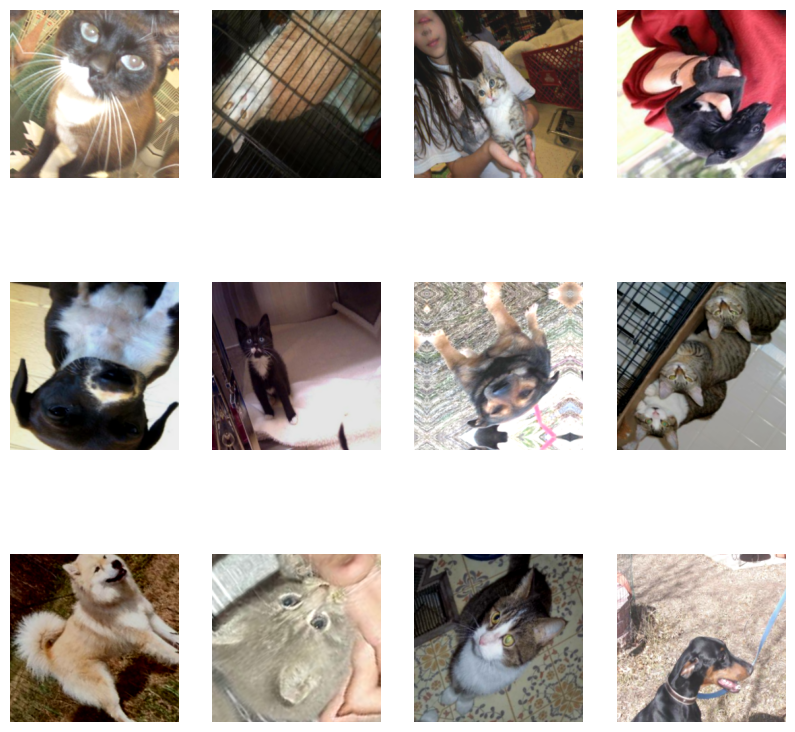

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in train_data.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        # plt.title(train_data[labels_batch[i]])
        plt.axis("off")

In [56]:
train_data=train_data.map(lambda x, y: (x/255, y))
test_data=test_data.map(lambda x, y: (x/255, y))

In [74]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3)
)
conv_base.trainable = False

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,GlobalAveragePooling2D

In [76]:
model = Sequential()
model.add(conv_base)

model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding='valid', strides=2))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding='valid', strides=2))

model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding='valid', strides=2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [71]:
model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 4, 4, 32)            │         147,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 2, 2, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 2, 2, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 1, 1, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 0, 0, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 0)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,962,977 (57.08 MB)

 Trainable params: 248,289 (969.88 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [77]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
# from tensorflow.keras.callbacks import EarlyStopping
# early_stopping = EarlyStopping(
#     monitor='val_loss',  # Monitor validation loss to decide when to stop training
#     patience=5,  # Stop training if validation loss doesn't improve for 5 consecutive epochs
#     restore_best_weights=True  # Restore the model weights from the epoch with the best validation loss
# )  # Prevents overfitting by stopping training early when the model stops improving


In [78]:
model.fit(train_data, epochs=10, validation_data=test_data)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 476s 733ms/step - accuracy: 0.7500 - loss: 0.4767 - val_accuracy: 0.9154 - val_loss: 0.2054
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 480s 724ms/step - accuracy: 0.8511 - loss: 0.3338 - val_accuracy: 0.9098 - val_loss: 0.2078
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 500s 721ms/step - accuracy: 0.8580 - loss: 0.3153 - val_accuracy: 0.9250 - val_loss: 0.1817
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 453s 725ms/step - accuracy: 0.8729 - loss: 0.2875 - val_accuracy: 0.9270 - val_loss: 0.1786
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 503s 725ms/step - accuracy: 0.8815 - loss: 0.2708 - val_accuracy: 0.9274 - val_loss: 0.1698
Epoch 6/10
613/625 ━━━━━━━━━━━━━━━━━━━━ 8s 674ms/step - accuracy: 0.8797 - loss: 0.2697

KeyboardInterrupt: 

In [30]:
model.evaluate(test_data)

157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.8279 - loss: 0.7753


[0.7087236642837524, 0.8349999785423279]

In [36]:
def do_prediction(image_path):
    import requests
    from PIL import Image
    import numpy as np
    if ".com" in image_path:
      response = requests.get(image_path, stream=True)
      response.raise_for_status()
      image = Image.open(response.raw)
      image = image.resize((256, 256))
      image_array = np.array(image) / 255.0
      image_array = np.expand_dims(image_array, axis=0)
    else:
      image = Image.open(image_path)
      image = image.resize((256, 256))
      image_array = np.array(image) / 255.0
      image_array = np.expand_dims(image_array, axis=0)

    prediction = model.predict(image_array)

    if prediction[0][0] > 0.5:
        print("Prediction: Dog")
    else:
        print("Prediction: Cat")


In [40]:
do_prediction("https://th.bing.com/th/id/OIP.3WlU_TEXHZN_X_8bNeT5KgHaC9?rs=1&pid=ImgDetMain")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction: Cat
